In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis. 

3) Determine distribution of test statistic and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong. 

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

State the null and alternative hypotheses.

Null: In El Paso County, half of voters support and half do not support the referendum.

Alternate: More than half of the eligible voters support the referendum.

#### Step 2: Test Statistic

Select a test statistic and compute that test statistic for the sample.

The test statistic in this example is going to be the ratio of supporters to the total number of voters.

#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

if H_0 were true, the p value should be approximately 0.5.

3b) In words (and in the context of this problem), describe what the $p$-value is. 

The p value is the percent that the test statistic or greater falls under the null hypothesis distribution.

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

In [2]:
#NOTE: I used several python boxes, so don't feel the need to put everything in this box.
ts=[]
for i in np.arange(10000):
    rs=stats.binom.rvs(200,.5,size=1)
    ts=np.append(ts,np.average(rs))
    

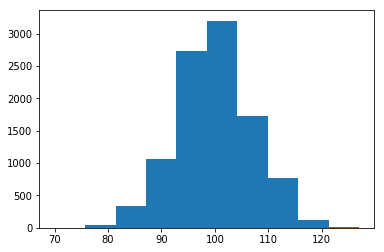

In [3]:
plt.hist(ts)
plt.show()

In [4]:
p_value=np.mean(ts>=115)
print(np.mean(ts)/200)
print('The p value is',p_value)

0.5000285
The p value is 0.0204


#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

In this case, we will reject the null hypothesis because of the small p-value.

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

In [16]:
bootstrap=stats.binom.rvs(200,115/200,size=1000)/200
rhs=percentile(97.5,bootstrap)
lhs=percentile(2.5,bootstrap)
print('The 95% range goes from',lhs,rhs)

The 95% range goes from 0.505 0.64


The 95% confidence interval using the bootstrap technique shows that 95% of the time, the percentage of people that support the referendum falls between 0.505 and 0.64. This does not contain 0.5. This shows that we could reject the null hypothesis.